In [51]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Date, Open, High, Low, Close, Volume, Adj. Close

In [253]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [31]:
df_now = pd.read_csv('NOW_Apr2014_Apr2017.csv')
df_now_date_index = pd.read_csv('NOW_Apr2014_Apr2017.csv', index_col="Date",
                                parse_dates=True, usecols=['Date', 'Adj Close'],
                                na_values=['nan'])
df_hcp = pd.read_csv('HCP_Apr2014_Apr2017.csv')
df_spy = pd.read_csv('SPY_Apr1993_Apr2017.csv')
df_ibm = pd.read_csv('IBM_Apr2014_Apr2017.csv')
df_ibm_date_index = pd.read_csv('IBM_Apr2014_Apr2017.csv', index_col='Date',
                                 parse_dates=True, usecols=['Date', 'Adj Close'],
                                 na_values=['nan'])
df_spy_date_index = pd.read_csv('SPY_Apr1993_Apr2017.csv', index_col="Date", 
                                parse_dates=True, usecols=['Date', 'Adj Close'],
                                na_values=['nan'])

In [5]:
print(df_now.head())
print(df_now.tail())
print(df_now[10:21]) # Slicing

         Date       Open       High        Low      Close   Volume  Adj Close
0  2017-04-17  85.040001  86.419998  84.919998  86.410004  1118200  86.410004
1  2017-04-13  84.370003  85.199997  84.339996  84.639999  1131900  84.639999
2  2017-04-12  85.010002  85.709999  84.029999  84.489998   873700  84.489998
3  2017-04-11  85.349998  85.989998  84.820000  85.389999   939000  85.389999
4  2017-04-10  85.949997  86.389999  85.419998  85.529999   658300  85.529999
           Date       Open       High        Low      Close    Volume  \
750  2014-04-24  54.700001  54.700001  45.070000  49.880001  10440700   
751  2014-04-23  55.090000  55.150002  52.520000  53.070000   3319000   
752  2014-04-22  53.470001  55.330002  53.160000  55.230000   2329300   
753  2014-04-21  52.099998  53.369999  51.299999  53.150002   1806900   
754  2014-04-17  53.150002  53.970001  51.900002  53.259998   1716100   

     Adj Close  
750  49.880001  
751  53.070000  
752  55.230000  
753  53.150002  
754  53.

In [6]:
print(df_now['Close'].max())
print(df_hcp['Close'].max())

93.970001
48.210003


In [8]:
print(df_now['Volume'].mean())
print(df_hcp['Volume'].mean())

1611836.02649
3742056.55629


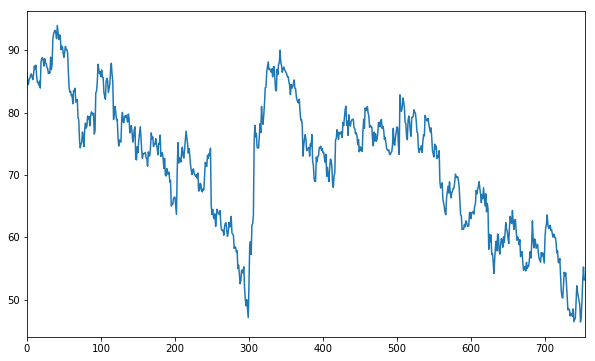

In [9]:
df_now['Adj Close'].plot()
plt.show()

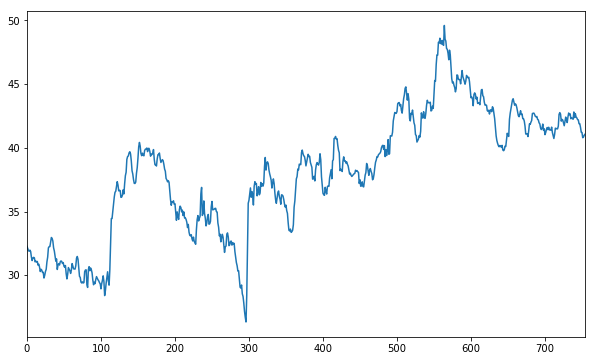

In [10]:
df_hcp['High'].plot()
plt.show()

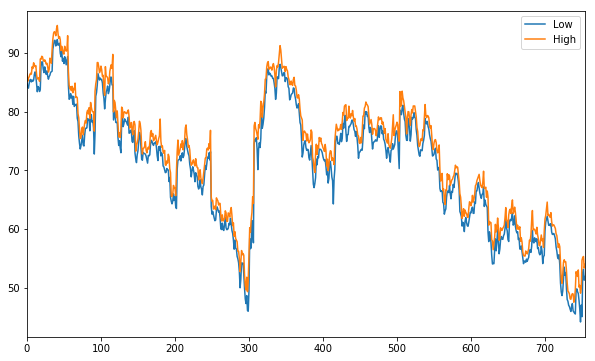

In [11]:
df_now[['Low', 'High']].plot()
plt.show()

In [12]:
Number_Of_NYSE_Trading_Days = 252

In [37]:
start_date = '2015-01-22'
end_date = '2015-01-26'

dates = pd.date_range(start_date, end_date)
print(dates)
print(dates[0])

DatetimeIndex(['2015-01-22', '2015-01-23', '2015-01-24', '2015-01-25',
               '2015-01-26'],
              dtype='datetime64[ns]', freq='D')
2015-01-22 00:00:00


In [38]:
df_new_index = pd.DataFrame(index=dates)
print(df_new_index)

Empty DataFrame
Columns: []
Index: [2015-01-22 00:00:00, 2015-01-23 00:00:00, 2015-01-24 00:00:00, 2015-01-25 00:00:00, 2015-01-26 00:00:00]


In [73]:
df_left_join = df_new_index.join(df_spy)

In [74]:
print(df_left_join)

                    Date  Open  High  Low  Close  Volume  Adj Close
2015-01-22 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN        NaN
2015-01-23 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN        NaN
2015-01-24 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN        NaN
2015-01-25 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN        NaN
2015-01-26 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN        NaN


In [41]:
df_left_join = df_new_index.join(df_spy_date_index)

In [42]:
print(df_left_join)

             Adj Close
2015-01-22  196.831546
2015-01-23  195.752359
2015-01-24         NaN
2015-01-25         NaN
2015-01-26  196.210769


In [43]:
df_left_join_no_na = df_left_join.dropna()
print(df_left_join_no_na)

             Adj Close
2015-01-22  196.831546
2015-01-23  195.752359
2015-01-26  196.210769


In [44]:
df_inner_join = df_new_index.join(df_spy_date_index, how='inner')
print(df_inner_join)

             Adj Close
2015-01-26  196.210769
2015-01-23  195.752359
2015-01-22  196.831546


In [81]:
all_join = df_new_index.join(df_now_date_index)
all_join = all_join.rename(columns={'Adj Close': 'NOW'})
all_join = all_join.join(df_ibm_date_index)
all_join = all_join.rename(columns={'Adj Close': 'IBM'})
all_join = all_join.join(df_spy_date_index)
all_join = all_join.rename(columns={'Adj Close': 'SPY'})
all_join = all_join.dropna()
print(all_join)

                  NOW         IBM         SPY
2015-01-22  66.139999  143.815515  196.831546
2015-01-23  68.739998  144.259758  195.752359
2015-01-26  68.010002  144.713264  196.210769


In [69]:
all_join.ix['2015-01-23':'2015-01-26']

,NOW,IBM,SPY
2015-01-23,68.739998,144.259758,195.752359
2015-01-26,68.010002,144.713264,196.210769


In [65]:
all_join['NOW']

2015-01-22    66.139999
2015-01-23    68.739998
2015-01-26    68.010002
Name: NOW, dtype: float64

In [68]:
all_join[['NOW', 'IBM']]

,NOW,IBM,SPY
NOW,NaN,NaN,NaN
IBM,NaN,NaN,NaN


In [70]:
all_join.ix['2015-01-23':'2015-01-26', ['NOW', 'IBM']]

,NOW,IBM
2015-01-23,68.739998,144.259758
2015-01-26,68.010002,144.713264


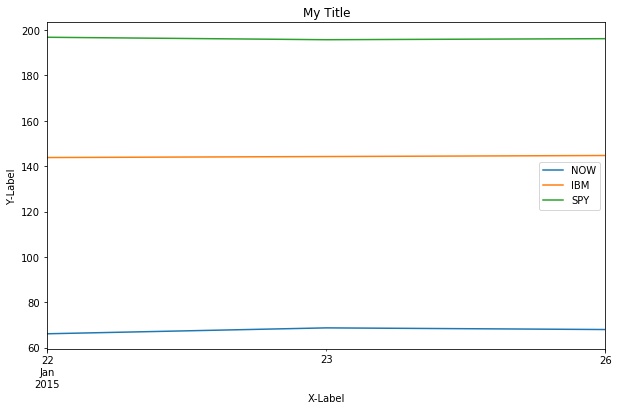

In [77]:
ax = all_join.plot(title='My Title')
ax.set_ylabel('Y-Label')
ax.set_xlabel('X-Label')
plt.show()

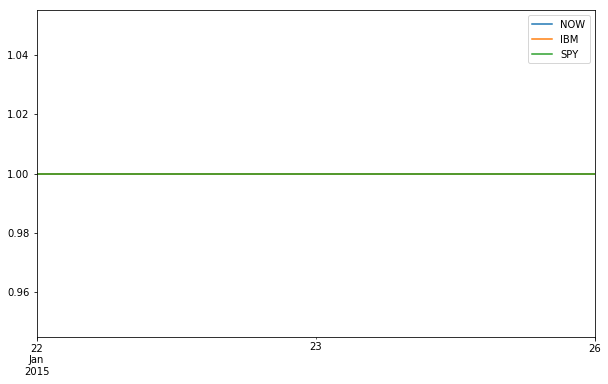

In [82]:
all_join = all_join / all_join.ix[0:]
all_join.plot()
plt.show()

In [117]:
date_index = pd.date_range('2010-01-01','2017-01-01')
df_date_index = pd.DataFrame(index=date_index)
all_join = df_date_index.join(df_now_date_index)
all_join = all_join.rename(columns={'Adj Close': 'NOW'})
all_join = all_join.join(df_ibm_date_index)
all_join = all_join.rename(columns={'Adj Close': 'IBM'})
all_join = all_join.join(df_spy_date_index)
all_join = all_join.rename(columns={'Adj Close': 'SPY'})
all_join = all_join.dropna()
print(all_join.head())

                  NOW         IBM         SPY
2014-04-17  53.259998  172.629395  175.366857
2014-04-21  53.150002  174.682677  175.978410
2014-04-22  55.230000  174.573644  176.778146
2014-04-23  53.070000  174.192064  176.364166
2014-04-24  49.880001  172.820192  176.721697


In [92]:
ndarray_all_join = all_join.values
print(all_join.shape)
print(ndarray_all_join.shape)

(683, 3)
(683, 3)


In [94]:
ndarray_all_join[10,2]
ndarray_all_join[0:2,0:2]
ndarray_all_join[-1,-2]

176.93809099999999

In [108]:
np.empty(5)
np.empty((5,4))
np.ones((5,4))
np.ones((5,4), dtype=np.int)
np.random.rand(5,4)
np.random.normal(size=(5,4))
np.random.randint(0,10, size=(2,3))
a = np.random.normal(size=(5,4))

In [114]:
a.shape
len(a.shape)
a.size
a.dtype

dtype('float64')

In [119]:
a.sum()
a.sum(axis=0)
a.sum(axis=1)
a.min(axis=0)
a.max(axis=1)

array([ 1.23506668,  0.70085965,  0.68182608,  0.67072594,  0.35811225])

In [122]:
%%time
a.argmin(axis=0)
a.argmax()

CPU times: user 252 µs, sys: 819 µs, total: 1.07 ms
Wall time: 893 µs


In [124]:
a[3,2]
a[:,0:3:2]

array([[-0.74252944, -0.20764805],
       [ 0.66634253, -0.78662336],
       [ 0.68182608, -1.25577022],
       [-0.22743508,  0.67072594],
       [-0.48240651,  0.35811225]])

In [131]:
a[0,1] = 2
a[0,:] = 2
a[0,:] = [1,2,3,4]
print(a)
indices = np.array([1,1,2,3])
a[indices]

[[ 1.          2.          3.          4.        ]
 [ 0.66634253  0.07561615 -0.78662336  0.70085965]
 [ 0.68182608 -0.47113753 -1.25577022 -0.32554106]
 [-0.22743508 -1.43163638  0.67072594 -0.2563393 ]
 [-0.48240651 -0.71728101  0.35811225 -0.53569512]]


array([[ 0.66634253,  0.07561615, -0.78662336,  0.70085965],
       [ 0.66634253,  0.07561615, -0.78662336,  0.70085965],
       [ 0.68182608, -0.47113753, -1.25577022, -0.32554106],
       [-0.22743508, -1.43163638,  0.67072594, -0.2563393 ]])

In [134]:
print(a > 0)
mean = a.mean()
print(a[a>mean])

[[ True  True  True  True]
 [ True  True False  True]
 [ True False False False]
 [False False  True False]
 [False False  True False]]
[ 1.          2.          3.          4.          0.66634253  0.70085965
  0.68182608  0.67072594  0.35811225]


In [223]:
all_join

,NOW,IBM,SPY
2014-04-17,53.259998,172.629395,175.366857
2014-04-21,53.150002,174.682677,175.978410
2014-04-22,55.230000,174.573644,176.778146
2014-04-23,53.070000,174.192064,176.364166
2014-04-24,49.880001,172.820192,176.721697
2014-04-25,47.230000,172.284163,175.272765
2014-04-28,46.419998,175.473092,175.827883
2014-04-29,49.169998,177.262893,176.646426
2014-04-30,49.720001,178.498491,177.173306
2014-05-01,50.480000,175.827417,177.192127


In [137]:
all_join.mean()

NOW     70.424348
IBM    151.580895
SPY    198.088076
dtype: float64

In [138]:
all_join.median()

NOW     73.070000
IBM    150.578100
SPY    199.336972
dtype: float64

In [139]:
all_join.std()

NOW     9.882962
IBM    14.233795
SPY    11.102784
dtype: float64

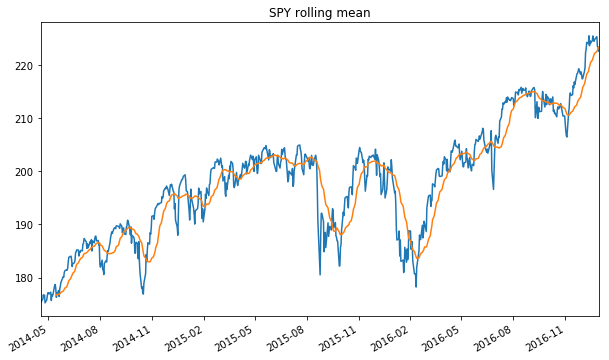

In [146]:
ax = all_join['SPY'].plot(title='SPY rolling mean', label='SPY')
rm = Series.rolling(all_join['SPY'], window=20).mean()
rm.plot(label='Rolling Mean', ax=ax)

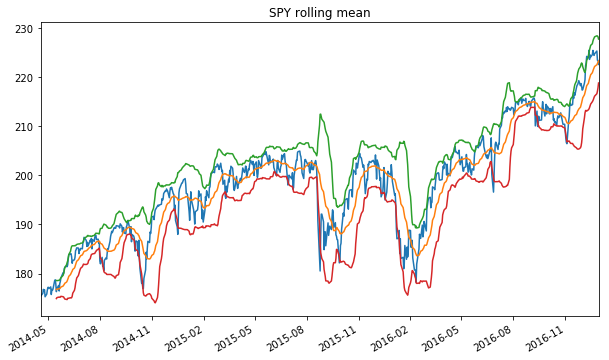

In [148]:
rm = Series.rolling(all_join['SPY'], window=20).mean()
st = Series.rolling(all_join['SPY'], window=20).std()
upper_bound = rm + 2 * st
lower_bound = rm - 2 * st

ax = all_join['SPY'].plot(title='SPY rolling mean', label='SPY')
rm.plot(label='Rolling Mean', ax=ax)
upper_bound.plot(ax=ax)
lower_bound.plot(ax=ax)

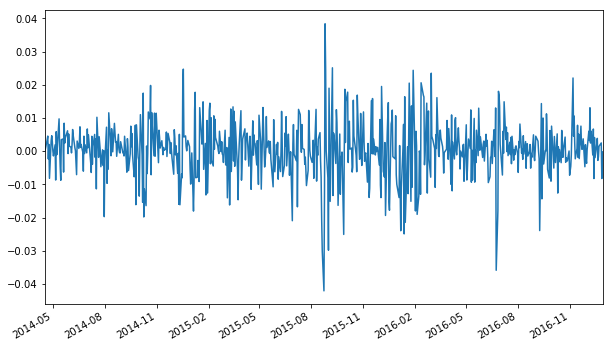

In [158]:
spy_daily_return = all_join['SPY'].copy()
# spy_daily_return[1:] = (all_join['SPY'][1:] / all_join['SPY'][:-1].values) - 1
spy_daily_return = (spy_daily_return / spy_daily_return.shift(1)) - 1
spy_daily_return.ix[0,0] = 0
spy_daily_return.plot()

In [159]:
spy_daily_return.fillna(method='ffill', inplace=True)
spy_daily_return.fillna(method='bfill', inplace=True)

In [210]:
def get_stock_date_range(start_date, end_date, stock_file):
    stocks = pd.read_csv(stock_file,
                          index_col="Date",
                          parse_dates=True,
                          usecols=['Date', 'Adj Close'],
                          na_values=['nan'])
    date_range = pd.date_range(start_date, end_date)
    df = pd.DataFrame(index=date_range)
    df = df.join(stocks)
    df = df.dropna()
    return df

now1 = get_stock_date_range('2015-01-01', '2015-04-01', 'NOW_Apr2014_Apr2017.csv')
now2 = get_stock_date_range('2015-01-01', '2017-04-01', 'NOW_Apr2014_Apr2017.csv')
spy1 = get_stock_date_range('2015-01-01', '2015-04-01', 'SPY_Apr1993_Apr2017.csv')

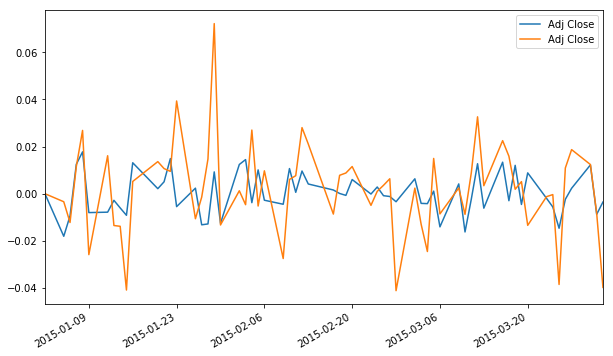

In [211]:
def get_daily_return(df):
    ret_df = df.copy()
    ret_df = (ret_df / ret_df.shift(1)) - 1
    ret_df.ix[0,0] = 0
    ret_df = ret_df.dropna()
    return ret_df

spy_daily_return = get_daily_return(spy1)
now_daily_return = get_daily_return(now1)

ax = spy_daily_return.plot()
now_daily_return.plot(ax=ax)

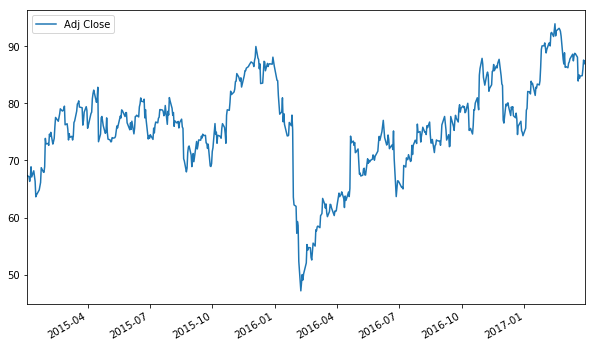

In [174]:
now2.plot()

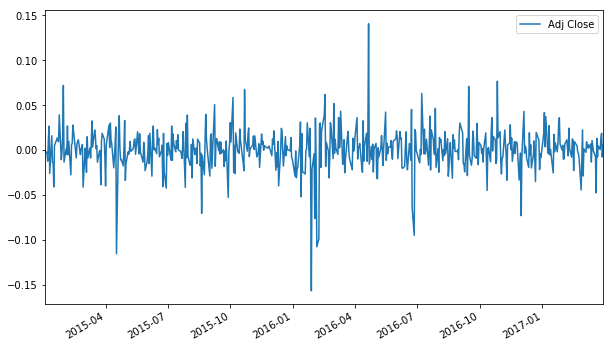

In [175]:
now2_daily_return = get_daily_return(now2)
now2_daily_return.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113448c10>]], dtype=object)

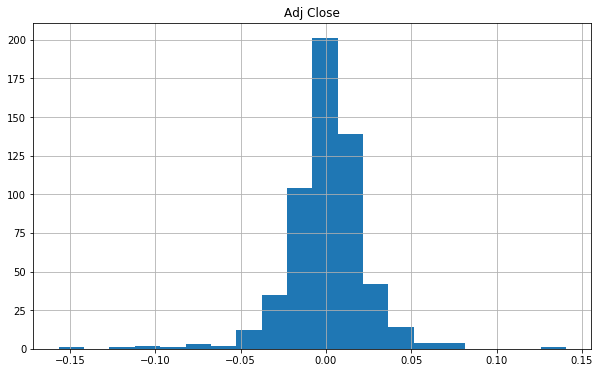

In [180]:
now2_daily_return.hist(bins=20)

In [181]:
now2_daily_return.mean()

Adj Close    0.000736
dtype: float64

In [182]:
now2_daily_return.std()

Adj Close    0.0233
dtype: float64

In [185]:
now2_daily_return.kurtosis()

Adj Close    8.616929
dtype: float64

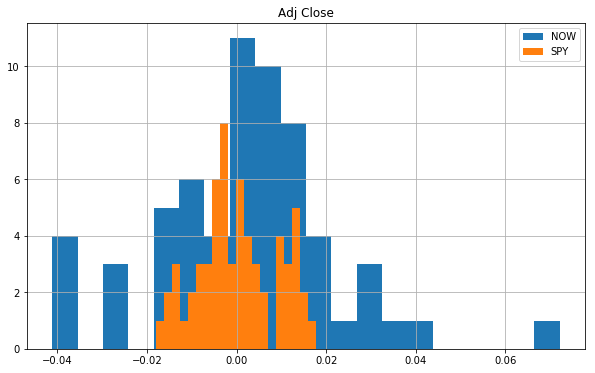

In [197]:
ax= now_daily_return.hist(bins=20, label='NOW')
spy_daily_return.hist(ax=ax,bins=20, label='SPY')
plt.legend(loc='upper right')
plt.show()

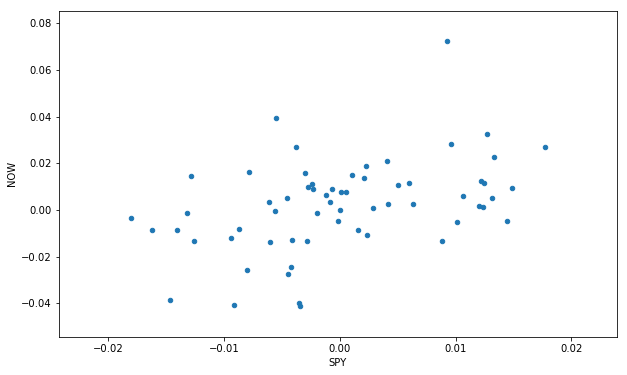

In [215]:
now3 = get_stock_date_range('2015-01-01', '2015-04-01', 'NOW_Apr2014_Apr2017.csv')
spy3 = get_stock_date_range('2015-01-01', '2015-04-01', 'SPY_Apr1993_Apr2017.csv')

now3_daily_return = get_daily_return(now3)
spy3_daily_return = get_daily_return(spy3)

combined_df = now3_daily_return.rename(columns={'Adj Close': 'NOW'})
combined_df = combined_df.join(spy3_daily_return)
combined_df = combined_df.rename(columns={'Adj Close': 'SPY'})

# combined_df = now3_daily_return.join(spy3_daily_return)
# combined_df = pd.DataFrame(index=date_range)
# combined_df['NOW'] = now3_daily_return
# combined_df['SPY'] = spy3_daily_return

combined_df.plot(kind='scatter', x='SPY', y='NOW')

In [219]:
beta, alpha = np.polyfit(combined_df['SPY'], combined_df['NOW'], 1)
print(beta, alpha)
combined_df.corr(method='pearson')

(0.96281445020637391, 0.0019317737976987162)


,NOW,SPY
NOW,1.000000,0.428808
SPY,0.428808,1.000000


In [222]:
np.sqrt(252)*(0.001-0.0002)/0.001

12.699606293110037

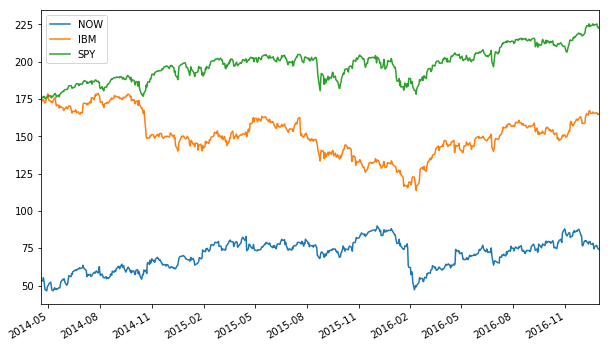

In [225]:
all_join.plot()

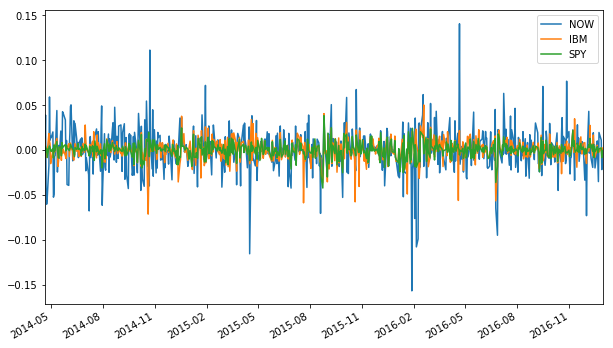

In [227]:
all_daily_return = get_daily_return(all_join)
all_daily_return.plot()

In [228]:
all_daily_return

,NOW,IBM,SPY
2014-04-21,-0.002065,0.011894,0.003487
2014-04-22,0.039134,-0.000624,0.004545
2014-04-23,-0.039109,-0.002186,-0.002342
2014-04-24,-0.060109,-0.007876,0.002027
2014-04-25,-0.053128,-0.003102,-0.008199
2014-04-28,-0.017150,0.018510,0.003167
2014-04-29,0.059242,0.010200,0.004655
2014-04-30,0.011186,0.006970,0.002983
2014-05-01,0.015286,-0.014964,0.000106
2014-05-02,0.013867,-0.010799,-0.001434


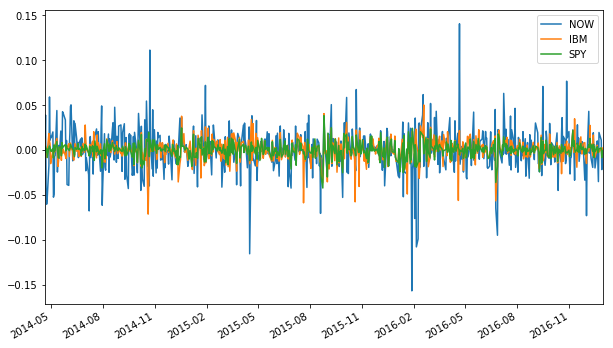

In [231]:
prices_daily_return = all_daily_return.copy()
prices_daily_return.plot()

In [232]:
prices_daily_return

,NOW,IBM,SPY
2014-04-21,-0.002065,0.011894,0.003487
2014-04-22,0.039134,-0.000624,0.004545
2014-04-23,-0.039109,-0.002186,-0.002342
2014-04-24,-0.060109,-0.007876,0.002027
2014-04-25,-0.053128,-0.003102,-0.008199
2014-04-28,-0.017150,0.018510,0.003167
2014-04-29,0.059242,0.010200,0.004655
2014-04-30,0.011186,0.006970,0.002983
2014-05-01,0.015286,-0.014964,0.000106
2014-05-02,0.013867,-0.010799,-0.001434


In [237]:
normed_daily_return = prices_daily_return / prices_daily_return.ix[0]
normed_daily_return

,NOW,IBM,SPY
2014-04-21,1.000000,1.000000,1.000000
2014-04-22,-18.948895,-0.052478,1.303169
2014-04-23,18.936642,-0.183769,-0.671528
2014-04-24,29.104873,-0.662142,0.581322
2014-04-25,25.724316,-0.260771,-2.351102
2014-04-28,8.304097,1.556201,0.908206
2014-04-29,-28.684800,0.857552,1.334957
2014-04-30,-5.416131,0.586038,0.855304
2014-05-01,-7.401268,-1.258107,0.030462
2014-05-02,-6.714334,-0.907953,-0.411116


In [238]:
allocated_daily_return = normed_daily_return * [0.5, 0.3, 0.2]
allocated_daily_return

,NOW,IBM,SPY
2014-04-21,0.500000,0.300000,0.200000
2014-04-22,-9.474447,-0.015743,0.260634
2014-04-23,9.468321,-0.055131,-0.134306
2014-04-24,14.552437,-0.198643,0.116264
2014-04-25,12.862158,-0.078231,-0.470220
2014-04-28,4.152048,0.466860,0.181641
2014-04-29,-14.342400,0.257266,0.266991
2014-04-30,-2.708065,0.175811,0.171061
2014-05-01,-3.700634,-0.377432,0.006092
2014-05-02,-3.357167,-0.272386,-0.082223


In [243]:
pos_val = allocated_daily_return * [2000, 2000, 2000]
pos_val

,NOW,IBM,SPY
2014-04-21,1000.000000,600.000000,400.000000
2014-04-22,-18948.894841,-31.486582,521.267521
2014-04-23,18936.641674,-110.261609,-268.611248
2014-04-24,29104.873279,-397.285419,232.528807
2014-04-25,25724.316112,-156.462837,-940.440967
2014-04-28,8304.096724,933.720495,363.282335
2014-04-29,-28684.800244,514.531084,533.982667
2014-04-30,-5416.130515,351.622585,342.121421
2014-05-01,-7401.268260,-754.864097,12.184783
2014-05-02,-6714.334094,-544.771777,-164.446356


In [245]:
port_val = pos_val.sum(axis=1)

In [251]:
def port_stat(portfolio):
    print(portfolio.mean())
    print(portfolio.std())
    print(portfolio.cumsum())

In [252]:
port_stat(port_val)

-338.045520329
11223.4040884
2014-04-21      2000.000000
2014-04-22    -16459.113902
2014-04-23      2098.654915
2014-04-24     31038.771582
2014-04-25     55666.183890
2014-04-28     65267.283444
2014-04-29     37630.996952
2014-04-30     32908.610443
2014-05-01     24764.662869
2014-05-02     17341.110642
2014-05-05      7674.098423
2014-05-06     31664.683342
2014-05-07     56213.596009
2014-05-08     59280.021725
2014-05-09     62664.250927
2014-05-12     43077.024081
2014-05-13     54858.283708
2014-05-14     50948.801539
2014-05-15     46792.913133
2014-05-16     51707.045093
2014-05-19     41792.201161
2014-05-20     39599.440685
2014-05-21     42173.297689
2014-05-22     21538.740570
2014-05-23      2006.206820
2014-05-27    -13918.586228
2014-05-28    -10097.162669
2014-05-29    -14535.460900
2014-05-30      4330.982150
2014-06-02     23801.402014
                  ...      
2016-11-17   -307576.801419
2016-11-18   -301624.679620
2016-11-21   -304527.290822
2016-11-22   -30254

In [254]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X, Y))
    return Y

def test_run():
    Xguess = 0.2
    min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
    print("Minima found at:")
    print('X = {}, Y = {}'.format(min_result.x, min_result.fun))

In [255]:
test_run()

X = [ 0.2], Y = [ 2.19]
X = [ 0.2], Y = [ 2.19]
X = [ 0.20000001], Y = [ 2.18999996]
X = [ 2.80000002], Y = [ 2.19000006]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [ 1.5], Y = [ 0.5]
